In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from ta import add_all_ta_features
from ta.volatility import BollingerBands
from ta.trend import PSARIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import RSIIndicator
RANDOM_STATE=42

In [2]:
#Reading all the csv files 

df=pd.read_csv("^NSEI(1).csv",index_col='Date',parse_dates=True)
df2=pd.read_csv("^IXIC.csv",index_col='Date',parse_dates=True)
df3=pd.read_csv("^GDAXI.csv",index_col='Date',parse_dates=True)
df4=pd.read_csv("^NYA.csv",index_col='Date',parse_dates=True)
df5=pd.read_csv("^NSEBANK.csv",index_col='Date',parse_dates=True)
df6=pd.read_csv("BTC-USD.csv",index_col='Date',parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [3]:
#calculating pct change for all the indices except the target index

df2['PCTNAS']=df2['Adj Close'].pct_change()
df2=df2['PCTNAS']
df2.head()

Date
2007-09-17         NaN
2007-09-18    0.027114
2007-09-19    0.005589
2007-09-20   -0.004572
2007-09-21    0.006378
Name: PCTNAS, dtype: float64

In [4]:
df3['PCTDAX']=df3['Adj Close'].pct_change()
df3=df3['PCTDAX']
df3.head()

Date
2007-09-17         NaN
2007-09-18    0.012749
2007-09-19    0.023185
2007-09-20   -0.002032
2007-09-21    0.007672
Name: PCTDAX, dtype: float64

In [5]:
df4['PCTNYA']=df4['Adj Close'].pct_change()
df4=df4['PCTNYA']
df4.head()

Date
2007-09-17         NaN
2007-09-18    0.031358
2007-09-19    0.006244
2007-09-20   -0.003453
2007-09-21    0.004565
Name: PCTNYA, dtype: float64

In [6]:
df5['PCTBN']=df5['Adj Close'].pct_change()
df5=df5['PCTBN']
df5.head()

Date
2007-09-17         NaN
2007-09-18    0.023568
2007-09-19    0.048473
2007-09-20   -0.001581
2007-09-21    0.010061
Name: PCTBN, dtype: float64

In [7]:
#droping rows with volume=0 

df = df[(df[['Volume']] != 0).all(axis=1)]
df=df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-21,6085.750000,6094.350098,6065.100098,6082.299805,6082.299805,130900.0
2013-01-22,6080.149902,6101.299805,6040.500000,6048.500000,6048.500000,129000.0
2013-01-23,6052.850098,6069.799805,6021.149902,6054.299805,6054.299805,137000.0
2013-01-24,6046.200195,6065.299805,6007.850098,6019.350098,6019.350098,185200.0
2013-01-25,6024.500000,6080.549805,6014.450195,6074.649902,6074.649902,147600.0


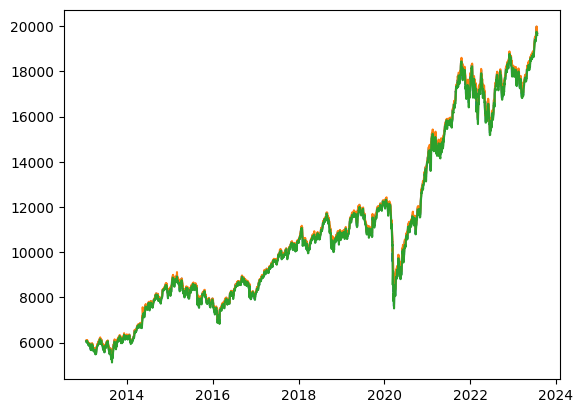

In [8]:
df1=df[['Adj Close','High','Low']]
plt.plot(df1)
plt.show()

In [9]:
#calculating ema for diff values of days 

df1.dropna(inplace=True)
ema_days=[5,9,21,50,250,500]
for ema in ema_days:
    
    df1[f"EMA{ema}"]=df['Adj Close'].ewm(span=ema, adjust=False).mean()
    df1[f"EMA{ema}"]=df1['Adj Close']/df1[f"EMA{ema}"]
    

C:\Users\Aditya\AppData\Local\Temp\ipykernel_988\668866451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_988\668866451.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[f"EMA{ema}"]=df['Adj Close'].ewm(span=ema, adjust=False).mean()
C:\Users\Aditya\AppData\Local\Temp\ipykernel_988\668866451.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [10]:

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=df['Adj Close'], window=10, window_dev=2)

# Add Bollinger Bands features
df1['bb_bbm'] = indicator_bb.bollinger_mavg()
df1['bb_bbh'] = indicator_bb.bollinger_hband()
df1['bb_bbl'] = indicator_bb.bollinger_lband()

# Add Bollinger Band high indicator
df1['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()
# Add Bollinger Band low indicator
df1['bb_bbli'] = indicator_bb.bollinger_lband_indicator()


In [11]:
df1.tail()

,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
Date,,,,,,,,,,,,,,
2023-07-19,19833.150391,19851.699219,19727.449219,1.007665,1.013476,1.027283,1.050602,1.106141,1.162364,19528.080273,19867.291945,19188.868602,0.0,0.0
2023-07-20,19979.150391,19991.849609,19758.400391,1.010005,1.016680,1.031577,1.055920,1.113270,1.170123,19576.265235,20008.450548,19144.079921,0.0,0.0
2023-07-21,19745.000000,19887.400391,19700.000000,0.998778,1.003808,1.017685,1.041766,1.099345,1.155687,19617.585156,20026.777315,19208.392998,0.0,0.0
2023-07-24,19672.349609,19782.750000,19658.300781,0.996730,1.000092,1.012657,1.036391,1.094469,1.150740,19649.230078,20019.690211,19278.769946,0.0,0.0
2023-07-25,19680.599609,19729.349609,19615.949219,0.998097,1.000409,1.011878,1.035331,1.094100,1.150528,19673.350000,20016.418284,19330.281716,0.0,0.0


<Axes: xlabel='Date'>

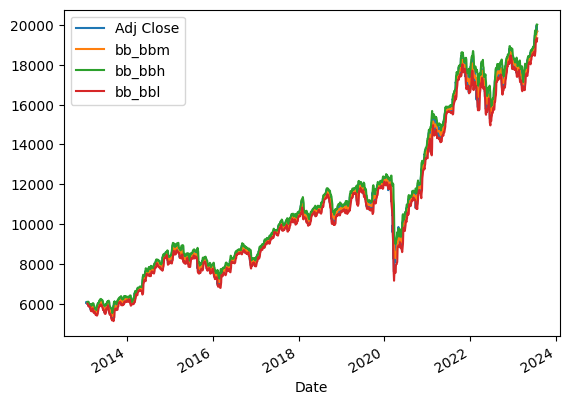

In [12]:
df1[['Adj Close','bb_bbm','bb_bbh','bb_bbl']].plot()

In [13]:
#calculating rsi 

rsi=RSIIndicator(close=df1['Adj Close'], window=12, fillna=False)
df1['RSI']=rsi.rsi()
df1.tail()
for i,j in df.iterrows():
    if df1['RSI'][i]>=70:
        df1['RSI'][i]=0
    elif df1['RSI'][i]<=30 :
        df1['RSI'][i]=1
    else:
        df1['RSI'][i]=0.5


<Axes: xlabel='Date'>

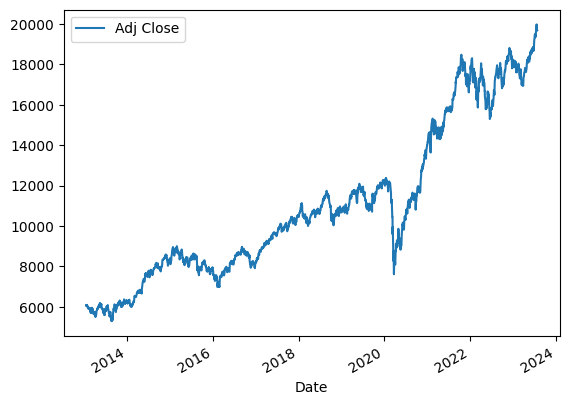

In [14]:
df1[['Adj Close']].plot()

In [15]:
#calculating pct change for target index

df1['PCT']=df1['Adj Close'].pct_change()
df1['CHANGE']=df1['Adj Close'].diff()

for i,j in df.iterrows():
    if df1['CHANGE'][i]>=0:
        df1['CHANGE'][i]=1
    else:
        df1['CHANGE'][i]=0
df1.head(10)
df1.tail(20)




,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,RSI,PCT,CHANGE
Date,,,,,,,,,,,,,,,,,
2023-06-27,18817.400391,18829.250000,18714.250000,1.003171,1.003885,1.008810,1.023127,1.060906,1.112418,18764.434766,18889.408882,18639.460650,0.0,0.0,0.5,0.006752,1.0
2023-06-28,18972.099609,19011.250000,18861.349609,1.007583,1.009687,1.015524,1.030264,1.069034,1.121019,18786.054688,18962.036466,18610.072909,1.0,0.0,0.5,0.008221,1.0
2023-06-30,19189.050781,19201.699219,19024.599609,1.012656,1.016914,1.024609,1.040330,1.080559,1.133233,18836.149805,19122.603579,18549.696030,1.0,0.0,0.0,0.011435,1.0
2023-07-03,19322.550781,19345.099609,19234.400391,1.013048,1.019100,1.028769,1.045617,1.087314,1.140474,18885.804883,19294.199807,18477.409959,1.0,0.0,0.0,0.006957,1.0
2023-07-04,19389.000000,19434.150391,19300.000000,1.010961,1.018002,1.029284,1.047192,1.090262,1.143737,18949.159961,19444.352894,18453.967028,0.0,0.0,0.0,0.003439,1.0
2023-07-05,19398.500000,19421.599609,19339.599609,1.007609,1.014746,1.027007,1.045748,1.090008,1.143639,19007.340039,19559.988756,18454.691322,0.0,0.0,0.0,0.000490,1.0
2023-07-06,19497.300781,19512.199219,19373.000000,1.008458,1.015868,1.029222,1.048974,1.094726,1.148778,19071.385156,19684.556551,18458.213761,0.0,0.0,0.0,0.005093,1.0
2023-07-07,19331.800781,19523.599609,19303.599609,0.999932,1.005788,1.018588,1.038438,1.084695,1.138395,19127.440234,19722.843079,18532.037390,0.0,0.0,0.5,-0.008488,0.0
2023-07-10,19355.900391,19435.849609,19327.099609,1.000785,1.005625,1.018020,1.038115,1.085303,1.139178,19196.480273,19717.018979,18675.941568,0.0,0.0,0.5,0.001247,1.0


In [16]:
df1['oc']= df['Open']-df['Adj Close']
for i,j in df.iterrows():
    if df1['oc'][i]>=0:
        df1['oc'][i]=1
    else:
        
        df1['oc'][i]=0
df1.head(10)


,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,RSI,PCT,CHANGE,oc
Date,,,,,,,,,,,,,,,,,,
2013-01-21,6082.299805,6094.350098,6065.100098,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,0.0,0.0,0.5,NaN,0.0,1.0
2013-01-22,6048.500000,6101.299805,6040.500000,0.996288,0.995549,0.994946,0.994660,0.994487,0.994465,NaN,NaN,NaN,0.0,0.0,0.5,-0.005557,0.0,1.0
2013-01-23,6054.299805,6069.799805,6021.149902,0.998161,0.997201,0.996271,0.995785,0.995477,0.995437,NaN,NaN,NaN,0.0,0.0,0.5,0.000959,1.0,0.0
2013-01-24,6019.350098,6065.299805,6007.850098,0.994920,0.993144,0.991374,0.990423,0.989811,0.989731,NaN,NaN,NaN,0.0,0.0,0.5,-0.005773,0.0,1.0
2013-01-25,6074.649902,6080.549805,6014.450195,1.002703,1.001814,1.000438,0.999541,0.998913,0.998828,NaN,NaN,NaN,0.0,0.0,0.5,0.009187,1.0,0.0
2013-01-28,6074.799805,6088.399902,6061.399902,1.001817,1.001470,1.000421,0.999583,0.998946,0.998858,NaN,NaN,NaN,0.0,0.0,0.5,0.000025,1.0,1.0
2013-01-29,6049.899902,6111.799805,6042.450195,0.998472,0.997891,0.996654,0.995662,0.994893,0.994784,NaN,NaN,NaN,0.0,0.0,0.5,-0.004099,0.0,1.0
2013-01-30,6055.750000,6071.950195,6044.149902,0.999625,0.999085,0.997833,0.996757,0.995888,0.995763,NaN,NaN,NaN,0.0,0.0,0.5,0.000967,1.0,1.0
2013-01-31,6034.750000,6058.049805,6025.149902,0.997436,0.996493,0.994882,0.993561,0.992494,0.992341,NaN,NaN,NaN,0.0,0.0,0.5,-0.003468,0.0,1.0


In [17]:
#calculating sma
sma_days=[5,9,21,50,250,500]
for sma in sma_days:
    df1[f"SMA{sma}"]=df['Adj Close'].rolling(sma).mean()
    df1[f"SMA{sma}"]=df1['Adj Close']/df1[f"SMA{sma}"]

df1.head(10)

,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,...,RSI,PCT,CHANGE,oc,SMA5,SMA9,SMA21,SMA50,SMA250,SMA500
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-21,6082.299805,6094.350098,6065.100098,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,0.5,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-22,6048.500000,6101.299805,6040.500000,0.996288,0.995549,0.994946,0.994660,0.994487,0.994465,NaN,...,0.5,-0.005557,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-23,6054.299805,6069.799805,6021.149902,0.998161,0.997201,0.996271,0.995785,0.995477,0.995437,NaN,...,0.5,0.000959,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-24,6019.350098,6065.299805,6007.850098,0.994920,0.993144,0.991374,0.990423,0.989811,0.989731,NaN,...,0.5,-0.005773,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-25,6074.649902,6080.549805,6014.450195,1.002703,1.001814,1.000438,0.999541,0.998913,0.998828,NaN,...,0.5,0.009187,1.0,0.0,1.003109,NaN,NaN,NaN,NaN,NaN
2013-01-28,6074.799805,6088.399902,6061.399902,1.001817,1.001470,1.000421,0.999583,0.998946,0.998858,NaN,...,0.5,0.000025,1.0,1.0,1.003383,NaN,NaN,NaN,NaN,NaN
2013-01-29,6049.899902,6111.799805,6042.450195,0.998472,0.997891,0.996654,0.995662,0.994893,0.994784,NaN,...,0.5,-0.004099,0.0,1.0,0.999224,NaN,NaN,NaN,NaN,NaN
2013-01-30,6055.750000,6071.950195,6044.149902,0.999625,0.999085,0.997833,0.996757,0.995888,0.995763,NaN,...,0.5,0.000967,1.0,1.0,1.000142,NaN,NaN,NaN,NaN,NaN
2013-01-31,6034.750000,6058.049805,6025.149902,0.997436,0.996493,0.994882,0.993561,0.992494,0.992341,NaN,...,0.5,-0.003468,0.0,1.0,0.996167,0.996668,NaN,NaN,NaN,NaN


In [18]:
df1['VOL']=df['Volume']
df1.head(10)

,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,...,PCT,CHANGE,oc,SMA5,SMA9,SMA21,SMA50,SMA250,SMA500,VOL
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-21,6082.299805,6094.350098,6065.100098,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,130900.0
2013-01-22,6048.500000,6101.299805,6040.500000,0.996288,0.995549,0.994946,0.994660,0.994487,0.994465,NaN,...,-0.005557,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,129000.0
2013-01-23,6054.299805,6069.799805,6021.149902,0.998161,0.997201,0.996271,0.995785,0.995477,0.995437,NaN,...,0.000959,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,137000.0
2013-01-24,6019.350098,6065.299805,6007.850098,0.994920,0.993144,0.991374,0.990423,0.989811,0.989731,NaN,...,-0.005773,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,185200.0
2013-01-25,6074.649902,6080.549805,6014.450195,1.002703,1.001814,1.000438,0.999541,0.998913,0.998828,NaN,...,0.009187,1.0,0.0,1.003109,NaN,NaN,NaN,NaN,NaN,147600.0
2013-01-28,6074.799805,6088.399902,6061.399902,1.001817,1.001470,1.000421,0.999583,0.998946,0.998858,NaN,...,0.000025,1.0,1.0,1.003383,NaN,NaN,NaN,NaN,NaN,113100.0
2013-01-29,6049.899902,6111.799805,6042.450195,0.998472,0.997891,0.996654,0.995662,0.994893,0.994784,NaN,...,-0.004099,0.0,1.0,0.999224,NaN,NaN,NaN,NaN,NaN,157600.0
2013-01-30,6055.750000,6071.950195,6044.149902,0.999625,0.999085,0.997833,0.996757,0.995888,0.995763,NaN,...,0.000967,1.0,1.0,1.000142,NaN,NaN,NaN,NaN,NaN,124200.0
2013-01-31,6034.750000,6058.049805,6025.149902,0.997436,0.996493,0.994882,0.993561,0.992494,0.992341,NaN,...,-0.003468,0.0,1.0,0.996167,0.996668,NaN,NaN,NaN,NaN,168500.0


In [19]:
#preparing target column

df1['PREDICT'] = df1['CHANGE'].shift(-1)

days=[5,9,21,50,250,500]
for da in days:
    df1[f"Trend{da}"]=df1.shift(1).rolling(da).sum()['PREDICT']

df1.head(5)

,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,...,SMA250,SMA500,VOL,PREDICT,Trend5,Trend9,Trend21,Trend50,Trend250,Trend500
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-21,6082.299805,6094.350098,6065.100098,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,...,NaN,NaN,130900.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-22,6048.500000,6101.299805,6040.500000,0.996288,0.995549,0.994946,0.994660,0.994487,0.994465,NaN,...,NaN,NaN,129000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-23,6054.299805,6069.799805,6021.149902,0.998161,0.997201,0.996271,0.995785,0.995477,0.995437,NaN,...,NaN,NaN,137000.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-24,6019.350098,6065.299805,6007.850098,0.994920,0.993144,0.991374,0.990423,0.989811,0.989731,NaN,...,NaN,NaN,185200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-25,6074.649902,6080.549805,6014.450195,1.002703,1.001814,1.000438,0.999541,0.998913,0.998828,NaN,...,NaN,NaN,147600.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#adding other indices data to main dataframe 

df1 = df1.dropna(subset=['PREDICT'])

df1 = df1.join(df2, how='outer')

df1 = df1.join(df3, how='outer')

df1 = df1.join(df4, how='outer')

df1 = df1.join(df5, how='outer')

df1=df1.dropna()

features=df1[[x for x in df1.columns if x not in 'PREDICT']]

features.head()

,Adj Close,High,Low,EMA5,EMA9,EMA21,EMA50,EMA250,EMA500,bb_bbm,...,Trend5,Trend9,Trend21,Trend50,Trend250,Trend500,PCTNAS,PCTDAX,PCTNYA,PCTBN
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-10,8565.549805,8646.250000,8470.500000,0.992818,0.988151,0.992375,1.008820,1.112137,1.201048,8741.784961,...,1.0,2.0,12.0,26.0,147.0,269.0,0.013041,0.008470,0.008179,0.018944
2015-02-11,8627.400391,8651.950195,8593.650391,0.999991,0.996226,0.999583,1.015463,1.119096,1.208709,8713.095020,...,2.0,2.0,12.0,26.0,148.0,270.0,0.002828,-0.000160,-0.002390,0.010041
2015-02-12,8711.549805,8732.549805,8599.250000,1.006475,1.004748,1.008477,1.024349,1.128842,1.219425,8689.015039,...,3.0,3.0,13.0,27.0,149.0,270.0,0.011753,0.015582,0.009758,0.009915
2015-02-13,8805.500000,8822.099609,8729.650391,1.011487,1.012429,1.017563,1.033961,1.139735,1.231433,8688.675000,...,4.0,4.0,14.0,28.0,150.0,271.0,0.007458,0.004007,0.004309,0.012604
2015-02-18,8869.099609,8894.299805,8808.900391,1.009790,1.013651,1.021080,1.038395,1.145347,1.237997,8701.124902,...,5.0,6.0,14.0,28.0,151.0,271.0,0.001447,0.006001,0.000870,0.005552


In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, df1['PREDICT'], test_size=0.25, random_state=RANDOM_STATE,shuffle=False)

In [22]:
from sklearn.svm import SVC 

para={ 'min_samples_split':[2,5,10,50,100,200,500,900,1000],
'max_depth':[1,2, 3, 4, 8, 16, 32, 64, None],
'n_estimators' : [10,50,100,500,1000,2000],
'criterion' :['gini', 'entropy']
     }


model = RandomForestClassifier(random_state = RANDOM_STATE)

In [23]:
"""from sklearn.model_selection import GridSearchCV




grid = GridSearchCV(estimator=model,param_grid=para, cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) """

'from sklearn.model_selection import GridSearchCV\n\n\n\n\ngrid = GridSearchCV(estimator=model,param_grid=para, cv=5) \n   \n# fitting the model for grid search \ngrid.fit(X_train, y_train) \n \n# print best parameter after tuning \nprint(grid.best_params_) '

In [24]:
model=RandomForestClassifier(n_estimators =1000,
                                             max_depth = 4, 
                                             min_samples_split = 100,
                                             random_state=RANDOM_STATE)

In [25]:
model.fit(X_train,y_train)

preds=model.predict(X_train)
predsT=model.predict(X_test)

print(accuracy_score(preds,y_train))
print(accuracy_score(predsT,y_test))

0.652027027027027
0.6518218623481782
